# Plots for the paper

# General 10x10 Case:

/rds/general/user/nk821/home/anaconda3/envs/networks/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[[0.80112195 0.11102347 0.67454124 0.78041927 0.55028778 0.29862913
  0.27404918 0.79120132 0.24742969 0.17316606]
 [0.72208663 0.96852581 0.09557359 0.56287047 0.83909487 0.6551208
  0.7555499  0.36030424 0.93577628 0.74894879]
 [0.59077723 0.22265941 0.43520566 0.71176488 0.49817992 0.4909907
  0.65993947 0.56374024 0.68994079 0.64455915]
 [0.83229312 0.57156362 0.92738622 0.38545998 0.17511483 0.36841731
  0.19674453 0.85386132 0.13506149 0.6677732 ]
 [0.59541282 0.84522385 0.27486258 0.87976084 0.41526486 0.78579227
  0.36406071 0.9046648  0.39122993 0.24366467]
 [0.4528482  0.17787407 0.84689599 0.23091774 0.44511135 0.96012896
  1.         0.5114854  0.85150897 0.32306538]
 [0.64118731 0.92203776 0.58343425 0.6345947  0.12806041 0.42034852
  0.16514241 0.37279369 0.39601804 0.80342941]
 [0.12868328 0.48683319 0.38149793 0.67715511 0.41038681 0.1315686
  0.90096747 0.79369287 0.89929545 0.47581558]
 [0.64873211 0.56404216 0.64161484 0.33303345 0.36857477 0.11529684
  0.37058948 0.

100%|██████████| 2000/2000 [01:24<00:00, 23.62it/s]


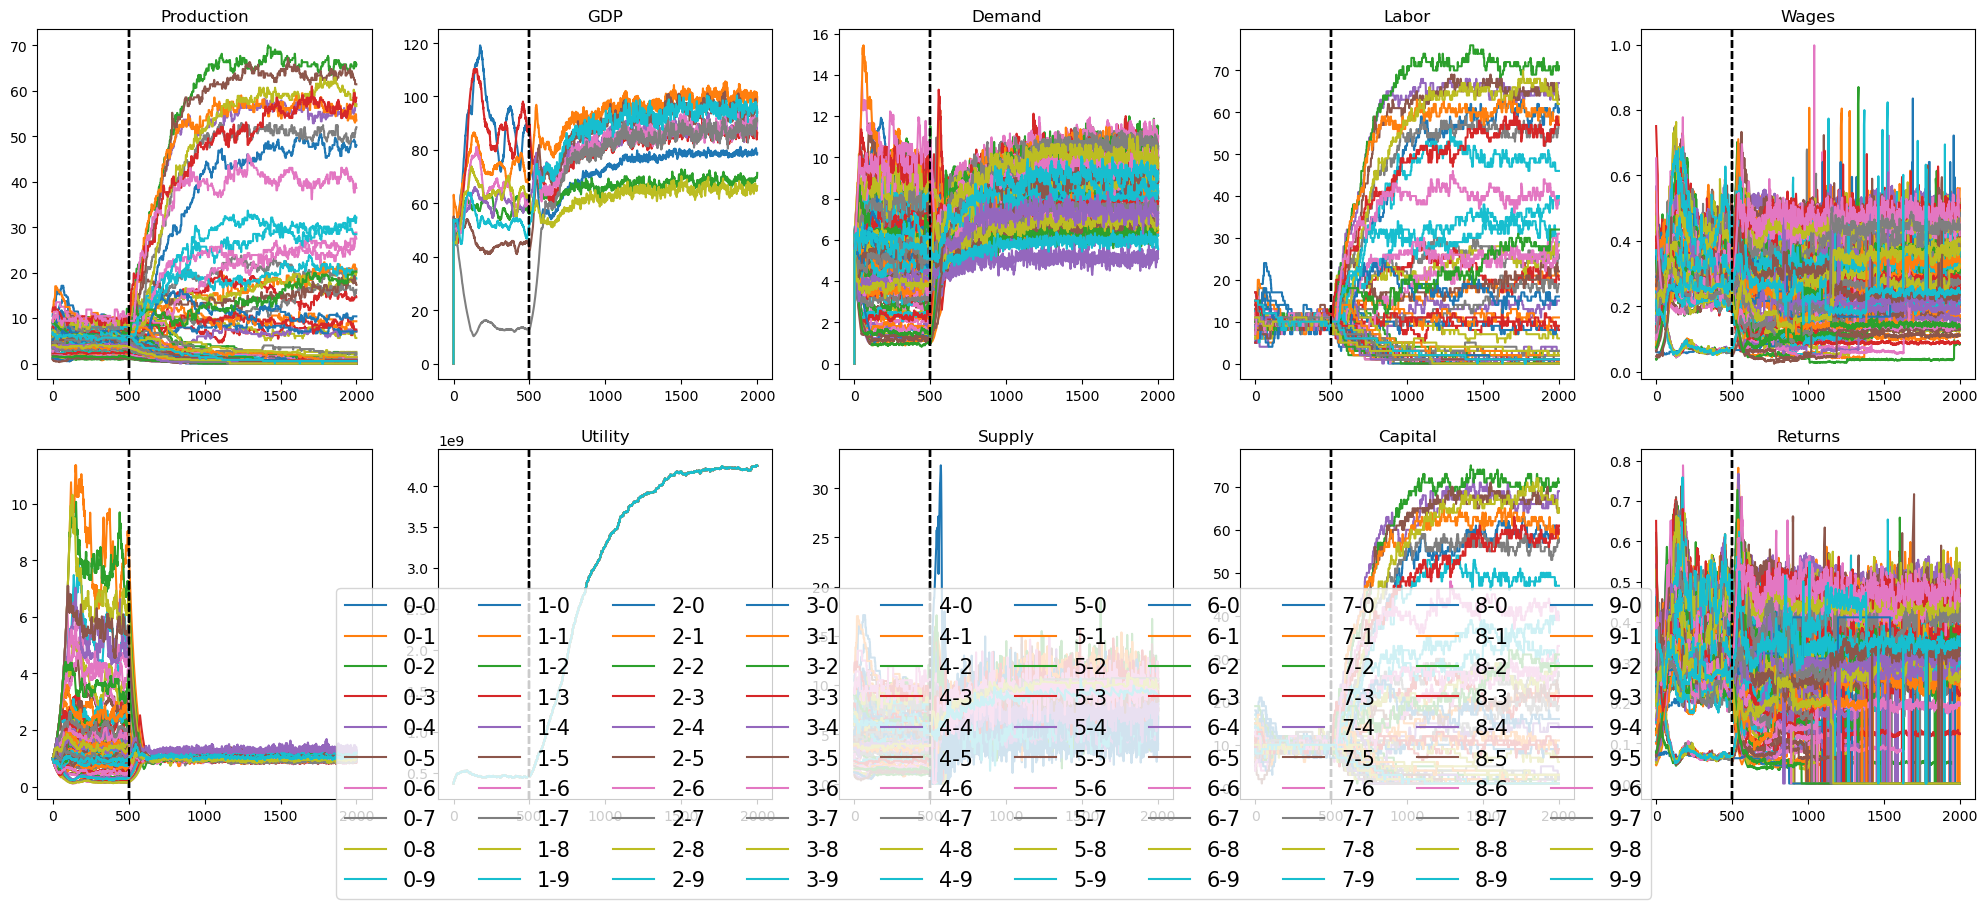

In [1]:
import numpy as np
import pandas as pd
from functions import production_function, regularise, wage_function, demand_function, innovate, plot_gdp_distribution, generate_nested_matrix, visualize_multi_layer_trade_network, array_to_dataframe
from tradeutils import doAllTrades
from pricing import updatePricesAndConsume
from tqdm import tqdm
from agents_vec import gulden_vectorised
import matplotlib.pyplot as plt

np.random.seed(10)

n_countries = 10
n_products = 10
countries = ['{i}'.format(i=i) for i in range(n_countries)]
products = ['{i}'.format(i=i) for i in range(n_products)]

# Initialize the A matrix with random non-zero values
A = np.random.rand(n_countries, n_products) + 0.1  # Ensure no value is zero by adding 0.1

# # Apply hierarchical structure
# for i in range(n_countries):
#     for j in range(n_products):
#         A[i, j] += i + j  # Increase values to create a hierarchical structure

# Normalize A to ensure values are scaled appropriately
A = A / np.max(A)
# print(A)

# # Define shock matrix (example: increase productivity in the first sector for the first country)
shock = A.copy()
# shock[0, :] *= 1.5  # Increase productivity by 50% in all sectors for the first country

# Share, weights, and elasticities
share = np.ones(n_countries)
weights = np.ones(n_products) / n_products
elasticities = np.ones(n_products)
sigma = 0.2

# Number of citizens in each nation
citizens_per_nation = [100] * n_countries
alpha = np.ones((n_countries, n_products)) * 0.5
beta = np.ones((n_countries, n_products)) * 0.5

# Run the simulation with the designed A matrix
results = gulden_vectorised('hierarchical_structure', n_countries, n_products, countries, products, citizens_per_nation, A, 
                            alpha, beta,  share, iterations=2000, Tr_time=500, trade_change=0.01, autarky_time=10000,
                            pricing_algorithm='dgp', utility_algorithm='ces', wage_algorithm='marginal_product', 
                            csv=False, plot=True, shock=shock, shock_time=10000,  cm_time=10000, d=0.000, 
                            c_names=countries, p_names=products, weights=weights, elasticities=elasticities, sigma=sigma)

# # Extract and plot the GDP results (example)
# gdp = results[1]

# # Plot GDP for each country
# plt.figure(figsize=(12, 8))
# for i, country in enumerate(countries):
#     plt.plot(gdp[:, i], label=country)

# plt.xlabel('Time')
# plt.ylabel('GDP')
# plt.title('GDP of Countries over Time')
# plt.legend()
# plt.grid(True)
# plt.show()


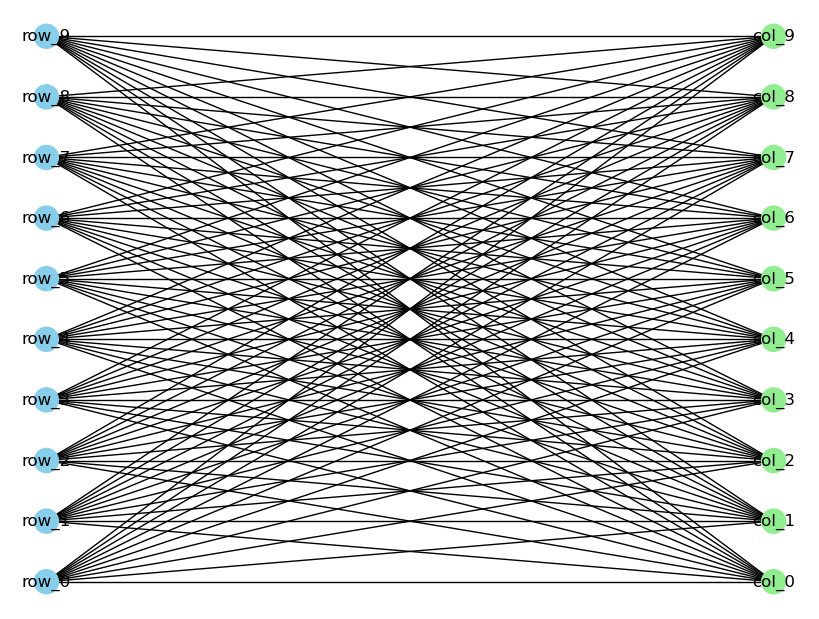

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def plot_bipartite_graph(A):
    # A is a 2D numpy array or matrix
    rows, cols = A.shape

    # Create a bipartite graph
    B = nx.Graph()

    # Add nodes for group 1 (rows)
    row_nodes = ['row_{}'.format(i) for i in range(rows)]
    B.add_nodes_from(row_nodes, bipartite=0)  # Group 1

    # Add nodes for group 2 (columns)
    col_nodes = ['col_{}'.format(j) for j in range(cols)]
    B.add_nodes_from(col_nodes, bipartite=1)  # Group 2

    # Add edges based on the non-zero entries in matrix A
    for i in range(rows):
        for j in range(cols):
            if A[i, j] != 0:
                B.add_edge('row_{}'.format(i), 'col_{}'.format(j), weight=A[i, j])

    # Set positions for nodes in bipartite graph
    pos = {}
    pos.update((node, (1, i)) for i, node in enumerate(row_nodes))  # Position group 1 nodes
    pos.update((node, (2, i)) for i, node in enumerate(col_nodes))  # Position group 2 nodes

    # Draw the bipartite graph
    plt.figure(figsize=(8, 6))
    nx.draw(B, pos, with_labels=True, node_color=['skyblue' if node in row_nodes else 'lightgreen' for node in B.nodes()])
    plt.show()


plot_bipartite_graph(results[2])

/rds/general/user/nk821/home/anaconda3/envs/networks/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Casting input data from float128 to float64 for imshow
  fig.canvas.print_figure(bytes_io, **kw)


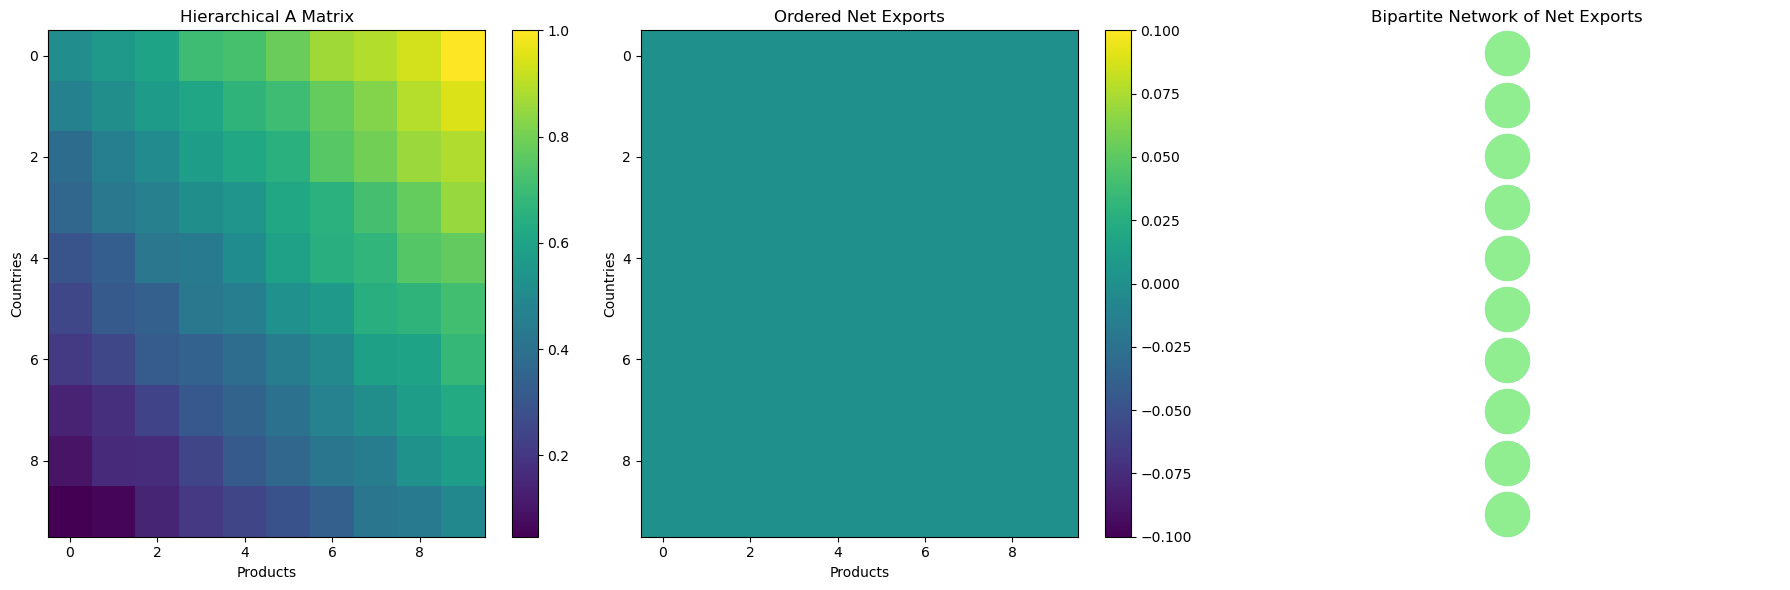

In [14]:
import networkx as nx

net_exports = results[2]  # Assuming results[2] is the net exports matrix
net_exports[net_exports > 0] = 0
net_exports = -net_exports
net_exports[net_exports == 0] = 0

# Normalize the net exports matrix to get the share of exports
total_exports = np.sum(net_exports, axis=1, keepdims=True)
share_exports = net_exports / total_exports

# Order countries by total exports in descending order
total_exports_sum = total_exports.flatten()
sorted_indices = np.argsort(total_exports_sum)[::-1]

# Order the A matrix and net exports matrix by the same order
A_ordered = A[sorted_indices, :]
net_exports_ordered = net_exports[sorted_indices, :]

# Define the nodes for countries and products
countries_ordered = ['{i}'.format(i=i) for i in sorted_indices]
products = ['{i}'.format(i=i) for i in range(n_products)]

# Create a bipartite graph
B = nx.Graph()

# Add nodes with the bipartite attribute
B.add_nodes_from(countries_ordered, bipartite=0)
B.add_nodes_from(products, bipartite=1)

# Add edges with the share of exports as weights
for i, country in enumerate(countries_ordered):
    for j, product in enumerate(products):
        if share_exports[sorted_indices[i], j] > 0:  # Add an edge only if there is a positive share of exports
            B.add_edge(country, product, weight=share_exports[sorted_indices[i], j])

# Get positions for the nodes in the bipartite graph
pos = nx.bipartite_layout(B, countries_ordered)

# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the hierarchical A matrix
im1 = axes[0].imshow(A_ordered, aspect='auto', cmap='viridis')
axes[0].set_title('Hierarchical A Matrix')
axes[0].set_xlabel('Products')
axes[0].set_ylabel('Countries')
fig.colorbar(im1, ax=axes[0])

# Plot the ordered net exports matrix
im2 = axes[1].imshow(net_exports_ordered, aspect='auto', cmap='viridis')
axes[1].set_title('Ordered Net Exports')
axes[1].set_xlabel('Products')
axes[1].set_ylabel('Countries')
fig.colorbar(im2, ax=axes[1])

# Plot the bipartite network without labels
nx.draw_networkx_nodes(B, pos, nodelist=countries_ordered, node_color='lightblue', node_size=1000, ax=axes[2])
nx.draw_networkx_nodes(B, pos, nodelist=products, node_color='lightgreen', node_size=1000, ax=axes[2])
edges = B.edges(data=True)
weights = [d['weight'] for (u, v, d) in edges]
nx.draw_networkx_edges(B, pos, edgelist=edges, width=weights, ax=axes[2])
axes[2].set_title('Bipartite Network of Net Exports')
axes[2].set_axis_off()  # Hide axis

plt.tight_layout()
plt.show()

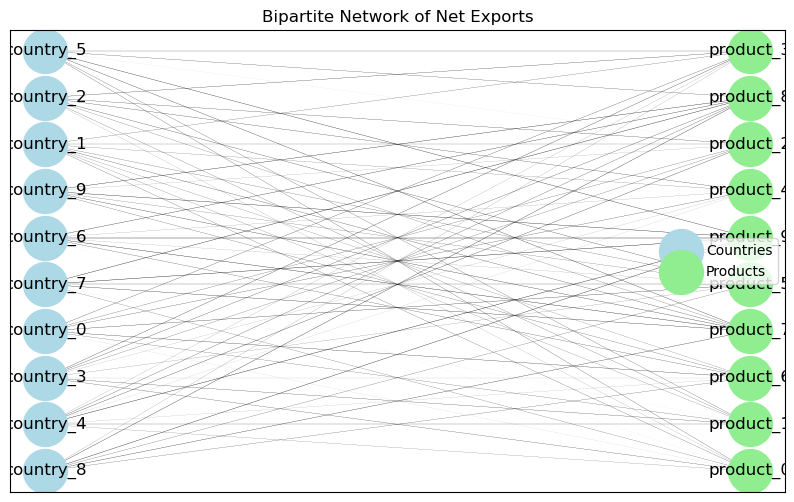

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the net exports matrix from the results
net_exports = results[2]  # Assuming results[3] is the net exports matrix
net_exports[net_exports>0]=0
net_exports = -net_exports
net_exports[net_exports==0]=0

# Normalize the net exports matrix to get the share of exports
total_exports = np.sum(net_exports, axis=1, keepdims=True)
share_exports = net_exports / total_exports
# Create a bipartite graph
B = nx.Graph()

# Define the nodes for countries and products
countries = ['country_{}'.format(i) for i in range(n_countries)]
products = ['product_{}'.format(i) for i in range(n_countries)]

# Add nodes with the bipartite attribute
B.add_nodes_from(countries, bipartite=0)
B.add_nodes_from(products, bipartite=1)

# Add edges with the share of exports as weights
for i, country in enumerate(countries):
    for j, product in enumerate(products):
        if share_exports[i, j] > 0:  # Add an edge only if there is a positive share of exports
            B.add_edge(country, product, weight=share_exports[i, j])
# Get positions for the nodes in the bipartite graph
pos = nx.bipartite_layout(B, countries)

# Draw the nodes and edges
plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(B, pos, nodelist=countries, node_color='lightblue', node_size=1000, label='Countries')
nx.draw_networkx_nodes(B, pos, nodelist=products, node_color='lightgreen', node_size=1000, label='Products')

# Draw edges with weights
edges = B.edges(data=True)
weights = [d['weight'] for (u, v, d) in edges]
nx.draw_networkx_edges(B, pos, edgelist=edges, width=weights)

# Draw labels
nx.draw_networkx_labels(B, pos)

# Add title and legend
plt.title('Bipartite Network of Net Exports')
plt.legend(loc='best')
plt.show()

exp = net_exports/net_exports.sum(axis=1)
plt.imshow(net_exports)

/rds/general/user/nk821/home/anaconda3/envs/networks/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Casting input data from float128 to float64 for imshow
  fig.canvas.print_figure(bytes_io, **kw)


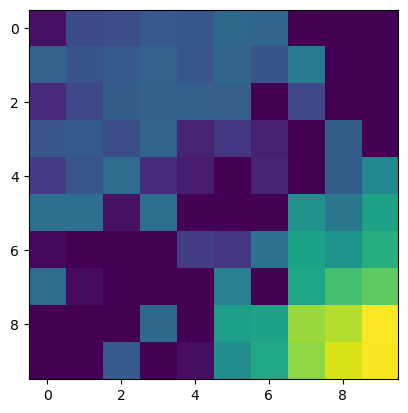

In [11]:
exp = net_exports/net_exports.sum(axis=1)
plt.imshow(net_exports)

In [25]:
from functions import visualize_multi_layer_trade_network
trades = results[6]
# visualize_multi_layer_trade_network(trades, n_countries, n_products-1)
# trades.to_csv('trades.csv')
plt.figure(figsize=(10,100))
trades

country                 0           1           2          3          4  \
Group Sector                                                              
0     1       3332.617742    0.360767    2.080006   0.852984   0.168900   
      2       3620.173733   24.253329   25.587284   8.262693  13.179247   
      3       4072.889841   14.391055   18.259003  30.644161  12.827220   
      4       4261.650416  129.866243  120.431676  81.323294  26.653256   
      5       4803.708601   86.333288  104.926750  70.618174  23.300535   
...                   ...         ...         ...        ...        ...   
9     5         31.026766   34.968559  105.726413  19.568211   0.000000   
      6         65.957059   46.407012   23.580772   0.089385   3.469041   
      7          0.863830    2.852733    1.942073   0.000000   0.000000   
      8          0.343750    0.000000    1.616837   2.786931   1.827299   
      9          0.000000    0.000000    4.811795   0.000000   4.861440   

country               5          6          7           8             9  
Group Sector                                                             
0     1        2.477050   0.448891   0.163986    0.209344      2.588920  
      2        7.454049   6.413751   5.962330    1.776040      5.074817  
      3       13.593628  11.084428  10.166500    4.953995      8.516566  
      4       53.648023  20.510782  21.401334    9.504944     17.882802  
      5       21.649197  26.961695  71.928033   26.836924     25.595700  
...                 ...        ...        ...         ...           ...  
9     5        0.000000   0.000000  12.334511  149.668477  12418.121137  
      6        0.000000  85.322625  23.660777  167.507265  13622.141929  
      7        4.981857   5.329734   4.652196    5.455756  15543.329108  
      8        1.076541   5.382290   3.944841    7.445581  16734.481388  
      9        5.743364   6.329541   7.048498   55.879570  18263.684045  

[90 rows x 10 columns]

<Figure size 1000x10000 with 0 Axes>

## Samuelson Outsourcing

100%|██████████| 2000/2000 [00:08<00:00, 248.40it/s]


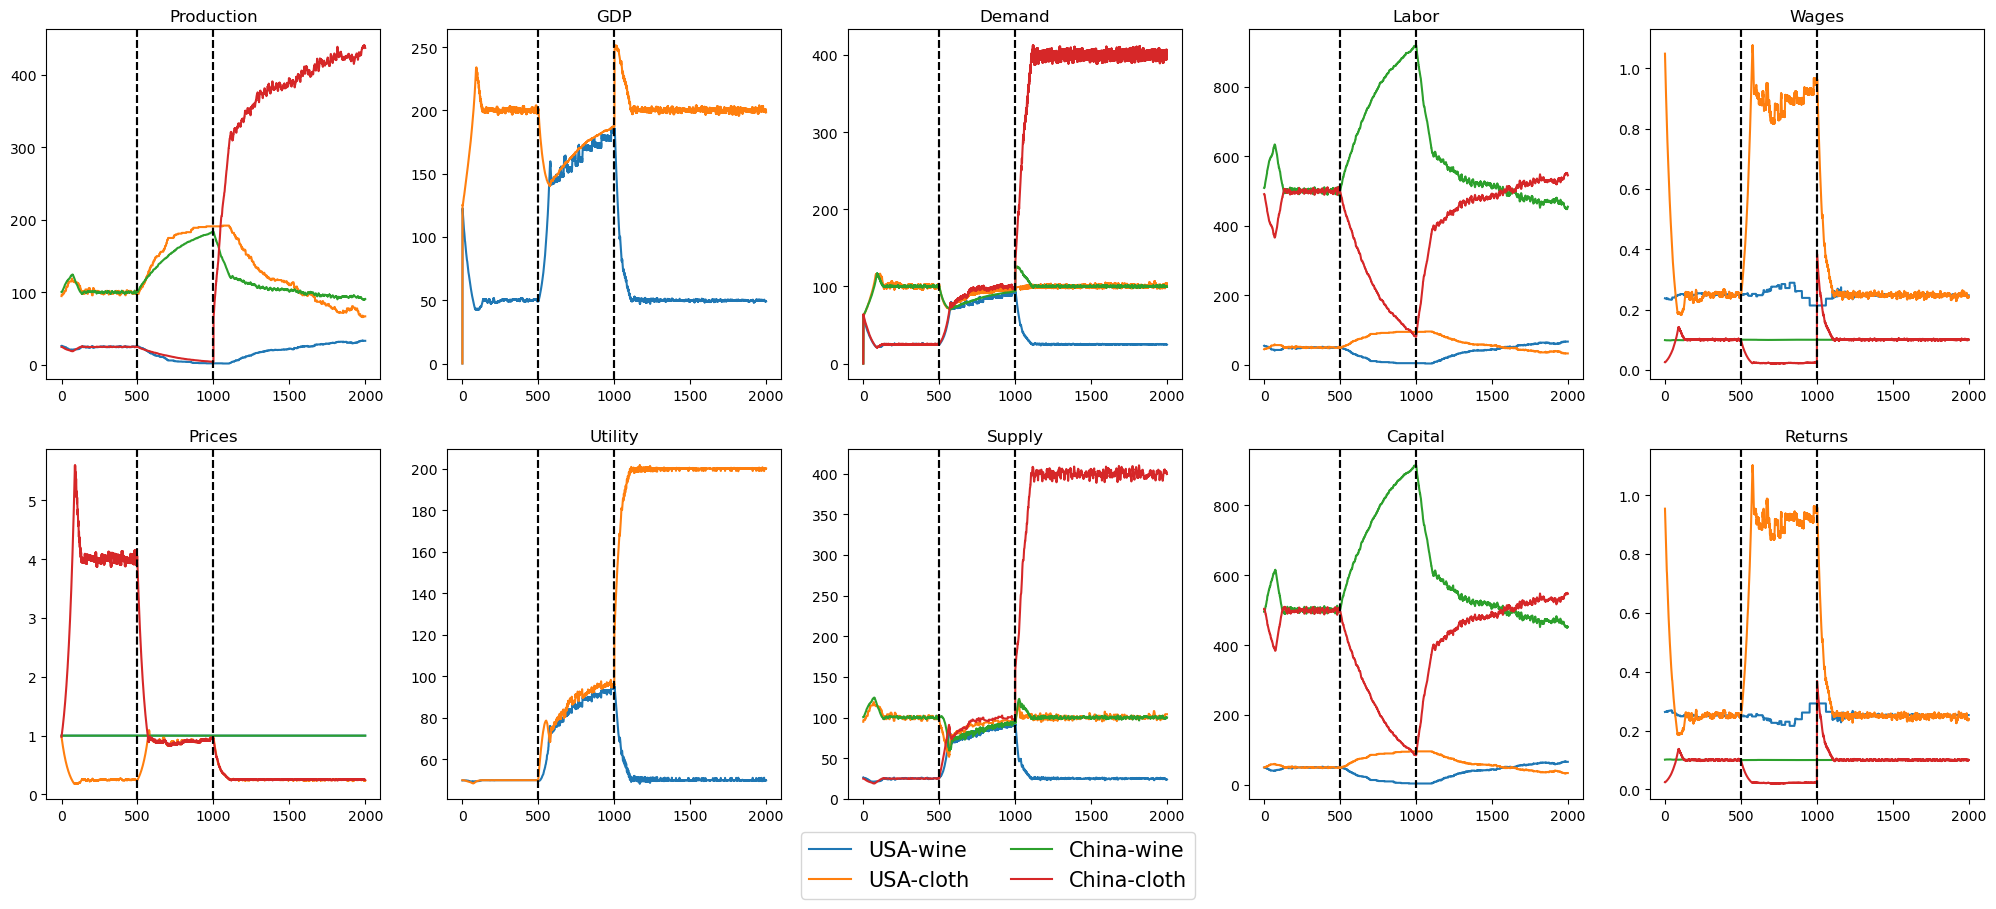

In [35]:
import numpy as np
import pandas as pd
from functions import production_function, regularise, wage_function, demand_function, innovate, plot_gdp_distribution, generate_nested_matrix, visualize_multi_layer_trade_network, array_to_dataframe
from tradeutils import doAllTrades
from pricing import updatePricesAndConsume
from tqdm import tqdm
from agents_vec import gulden_vectorised
np.random.seed(10)

n_countries=2
n_products=2
countries = ['{i}'.format(i=i) for i in range(n_countries)]
products = ['{i}'.format(i=i) for i in range(n_products)]

A     = np.array([[0.5, 2.0],
                  [0.2, 0.05]])  # Total Factor Productivity

shock = np.array([[0.5, 2.0],
                  [0.2, 0.8]])  # Total Factor Productivity

share = np.ones(n_countries)
share = np.array([1,0.5])

# Number of citizens in each nation
citizens_per_nation = [100, 1000]
alpha = np.ones((n_countries, n_products)) * 0.5
beta = np.ones((n_countries, n_products)) * 0.5

results = gulden_vectorised('gulden_samuelson', n_countries, n_products, countries, products, citizens_per_nation, A, 
                            alpha, beta,  share, iterations=2000, Tr_time=500, trade_change=0.01, autarky_time=10000,
                            pricing_algorithm='dgp', utility_algorithm='geometric', wage_algorithm='marginal_product', 
                            csv=False, plot=True, shock=shock, shock_time=1000,  cm_time=10000, d=0.000, 
                            c_names=['USA', 'China'], p_names=['wine','cloth'])



In [1]:
import numpy as np
import pandas as pd
from functions import production_function, regularise, wage_function, demand_function, innovate, plot_gdp_distribution, generate_nested_matrix, visualize_multi_layer_trade_network, array_to_dataframe
from tradeutils import doAllTrades
from pricing import updatePricesAndConsume
from tqdm import tqdm
from agents_vec import gulden_vectorised
np.random.seed(10)

n_countries=2
n_products=2
countries = ['{i}'.format(i=i) for i in range(n_countries)]
products = ['{i}'.format(i=i) for i in range(n_products)]
share = np.ones(n_countries)
# share = np.array([1,0.5])

# Number of citizens in each nation
citizens_per_nation = [100, 1000]
alpha = np.ones((n_countries, n_products)) * 0.5
beta = np.ones((n_countries, n_products)) * 0.5

s = np.linspace(0.01, 0.8, 20)
gdpdiff=[]
exports=[]
for si in s:
    A     = np.array([[0.5, 2.0],
                      [0.2, 0.05]])  # Total Factor Productivity

    shock = np.array([[0.5, 2.0],
                      [0.2, si]])  # Total Factor Productivity



    results = gulden_vectorised('gulden_samuelson', n_countries, n_products, countries, products, citizens_per_nation, A, 
                                alpha, beta,  share, iterations=2000, Tr_time=500, trade_change=0.01, autarky_time=10000,
                                pricing_algorithm='dgp', utility_algorithm='geometric', wage_algorithm='marginal_product', 
                                csv=False, plot=False, shock=shock, shock_time=1000,  cm_time=10000, d=0.000, 
                                c_names=['USA', 'China'], p_names=['wine','cloth'])
    
    net_exports = results[2]  
    net_exports[net_exports<0]=0
#     net_exports = -net_exports
    exports.append(net_exports.sum(axis=1))
    gdp = results[1]
#     print(gdp)
    gdpdiff.append(gdp[1] - gdp[0])
    
    


/rds/general/user/nk821/home/anaconda3/envs/networks/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
 50%|█████     | 1001/2000 [00:03<00:03, 262.05it/s]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
diff=[]
for i in range(len(gdpdiff)):
    diff.append(gdpdiff[i][-1])

plt.plot(s/0.2, diff, 'k')
plt.axvline(x=1)
plt.xlabel(r'$\frac{A^{China}_{cloth}}{A^{China}_{wine}}$')
plt.ylabel('Differences in GDP')
plt.title('Variables gains from trade with technological innovation')
plt.show()
plt.plot(s/0.2, exports, label=['USA','China'])
plt.axvline(x=1)
plt.xlabel(r'$\frac{A^{China}_{cloth}}{A^{China}_{wine}}$')
plt.ylabel('Total Exports')
plt.title('Variables gains from trade with technological innovation')
plt.legend()
plt.show()

# Adding a 3rd country

100%|██████████| 2000/2000 [00:13<00:00, 146.73it/s]


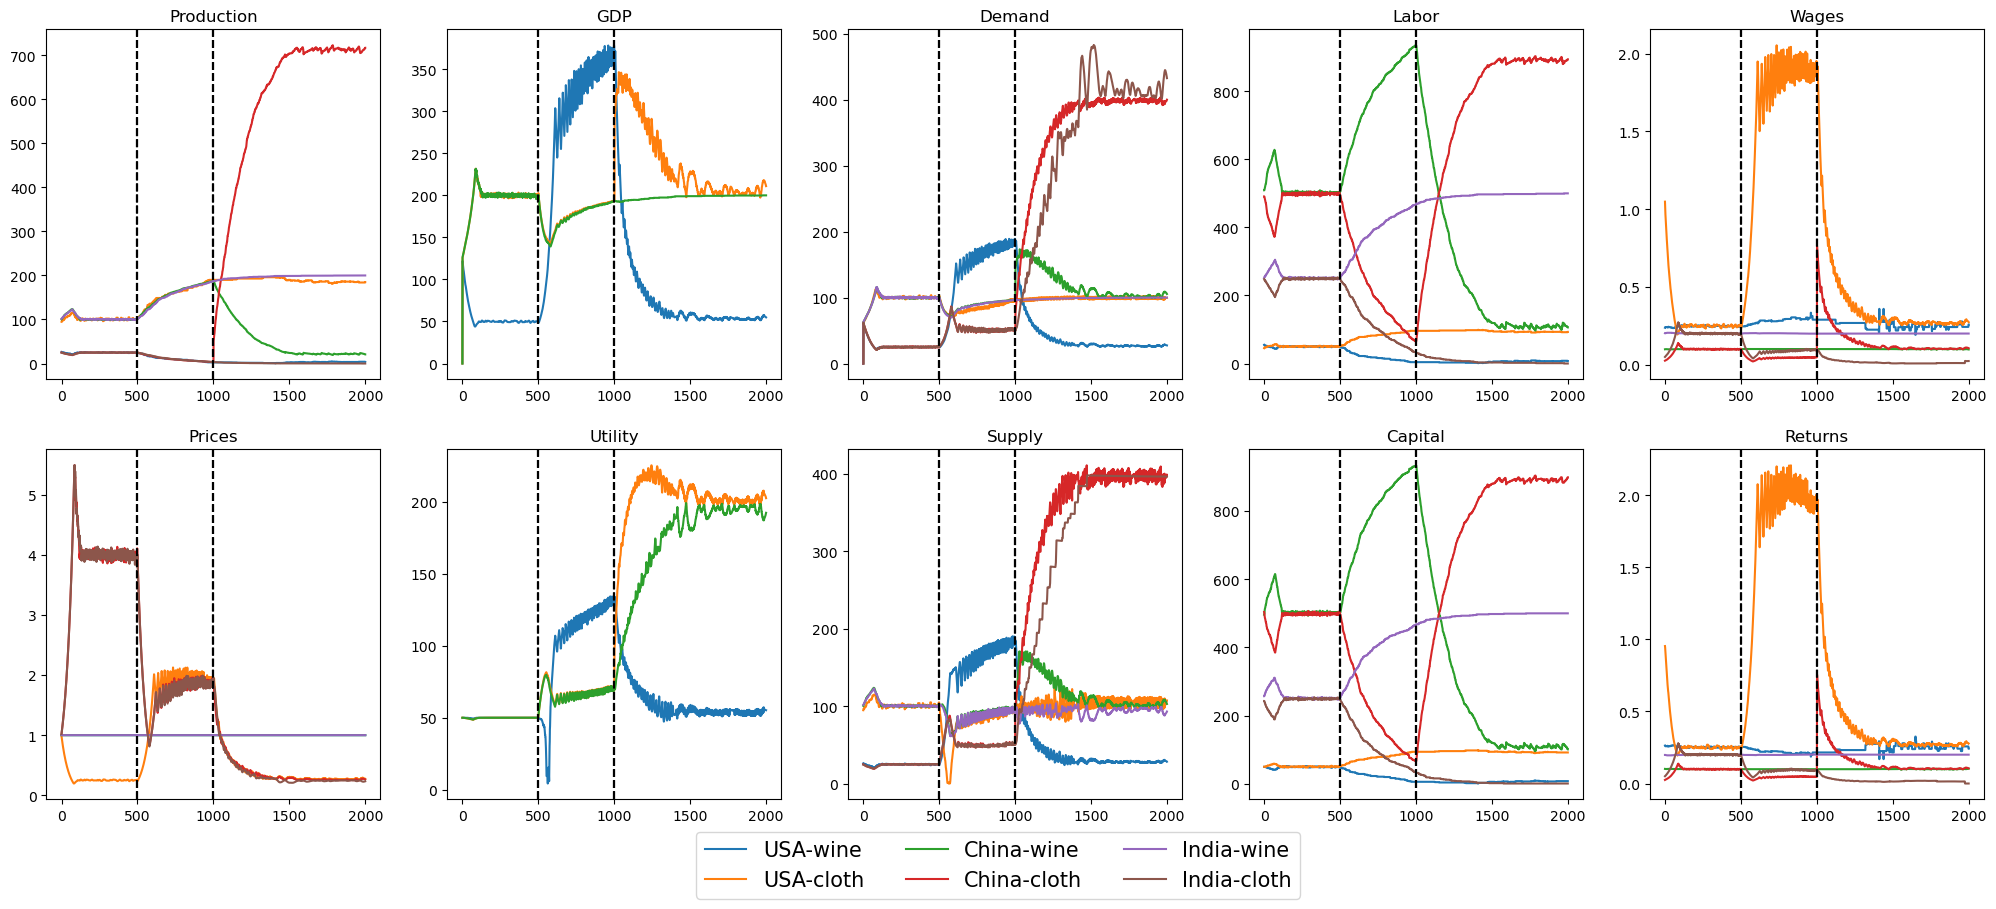

In [54]:
import numpy as np
import pandas as pd
from functions import production_function, regularise, wage_function, demand_function, innovate, plot_gdp_distribution, generate_nested_matrix, visualize_multi_layer_trade_network, array_to_dataframe
from tradeutils import doAllTrades
from pricing import updatePricesAndConsume
from tqdm import tqdm
from agents_vec import gulden_vectorised
np.random.seed(10)

n_countries=3
n_products=2
countries = ['{i}'.format(i=i) for i in range(n_countries)]
products = ['{i}'.format(i=i) for i in range(n_products)]

A     = np.array([[0.5, 2.0],
                  [0.2, 0.05],
                  [0.4, 0.1]])  # Total Factor Productivity

shock = np.array([[0.5, 2.0],
                  [0.2, 0.8],
                  [0.4, 0.1]])  # Total Factor Productivity

share = np.ones(n_countries)
# share = np.array([1,0.5])

# Number of citizens in each nation
citizens_per_nation = [100, 1000, 500]
alpha = np.ones((n_countries, n_products)) * 0.5
beta = np.ones((n_countries, n_products)) * 0.5

results = gulden_vectorised('gulden_samuelson', n_countries, n_products, countries, products, citizens_per_nation, A, 
                            alpha, beta,  share, iterations=2000, Tr_time=500, trade_change=0.01, autarky_time=10000,
                            pricing_algorithm='cpmu', utility_algorithm='geometric', wage_algorithm='marginal_product', 
                            csv=False, plot=True, shock=shock, shock_time=1000,  cm_time=10000, d=0.000, 
                            c_names=['USA', 'China', 'India'], p_names=['wine','cloth'])



In [2]:
import numpy as np
import pandas as pd
from functions import production_function, regularise, wage_function, demand_function, innovate, plot_gdp_distribution, generate_nested_matrix, visualize_multi_layer_trade_network, array_to_dataframe
from tradeutils import doAllTrades
from pricing import updatePricesAndConsume
from tqdm import tqdm
from agents_vec import gulden_vectorised
np.random.seed(10)

n_countries=3
n_products=2
countries = ['{i}'.format(i=i) for i in range(n_countries)]
products = ['{i}'.format(i=i) for i in range(n_products)]
share = np.ones(n_countries)
# share = np.array([1,0.5])

# Number of citizens in each nation
citizens_per_nation = [100, 1000, 500]
alpha = np.ones((n_countries, n_products)) * 0.5
beta = np.ones((n_countries, n_products)) * 0.5

s = np.linspace(0.01, 0.8, 20)
gdpdiff1=[]
gdpdiff2=[]
exports=[]
for si in s:
    A     = np.array([[0.5, 2.0],
                  [0.2, 0.05],
                  [0.4, 0.1]])  # Total Factor Productivity

    shock = np.array([[0.5, 2.0],
                      [0.2, si],
                      [0.4, 0.1]])  # Total Factor Productivity



    results = gulden_vectorised('gulden_samuelson', n_countries, n_products, countries, products, citizens_per_nation, A, 
                                alpha, beta,  share, iterations=2000, Tr_time=500, trade_change=0.01, autarky_time=10000,
                                pricing_algorithm='dgp', utility_algorithm='geometric', wage_algorithm='marginal_product', 
                                csv=False, plot=False, shock=shock, shock_time=1000,  cm_time=10000, d=0.000, 
                                c_names=['USA', 'China'], p_names=['wine','cloth'])
    
    net_exports = results[2]  
    net_exports[net_exports>0]=0
    net_exports = -net_exports
    exports.append(net_exports.sum(axis=1))
    gdp = results[1]
#     print(gdp)
    gdpdiff1.append(gdp[1] - gdp[0])
    gdpdiff2.append(gdp[2] - gdp[1])
    

/rds/general/user/nk821/home/anaconda3/envs/networks/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
100%|██████████| 2000/2000 [00:13<00:00, 150.80it/s]


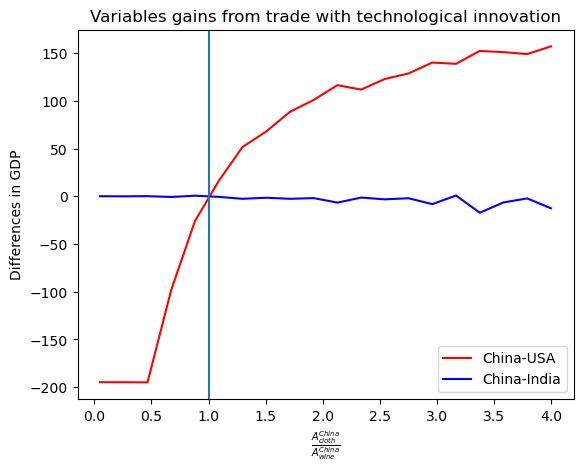

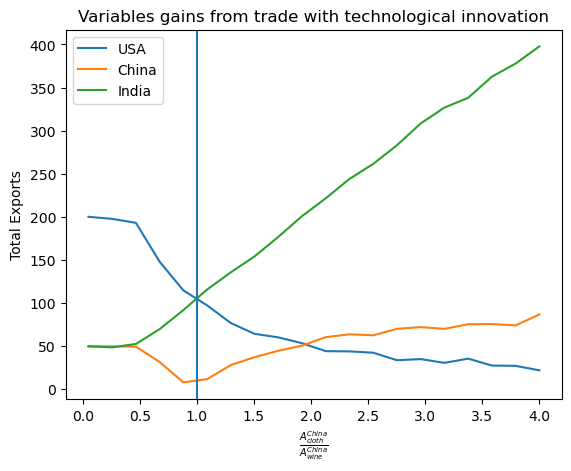

In [5]:
import matplotlib.pyplot as plt
diff1=[]
diff2=[]
for i in range(len(gdpdiff1)):
    diff1.append(gdpdiff1[i][-1])
    diff2.append(gdpdiff2[i][-1])
plt.plot(s/0.2, diff1, '-r', label='China-USA')
plt.plot(s/0.2, diff2, '-b', label='China-India')

plt.axvline(x=1)
plt.xlabel(r'$\frac{A^{China}_{cloth}}{A^{China}_{wine}}$')
plt.ylabel('Differences in GDP')
plt.title('Variables gains from trade with technological innovation')
plt.legend()
plt.show()

plt.plot(s/0.2, exports, label=['USA','China','India'])
plt.axvline(x=1)
plt.xlabel(r'$\frac{A^{China}_{cloth}}{A^{China}_{wine}}$')
plt.ylabel('Total Exports')
plt.title('Variables gains from trade with technological innovation')
plt.legend()
plt.show()

# Increasing Returns to Scale

/rds/general/user/nk821/home/anaconda3/envs/networks/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
100%|██████████| 3000/3000 [00:09<00:00, 315.78it/s]


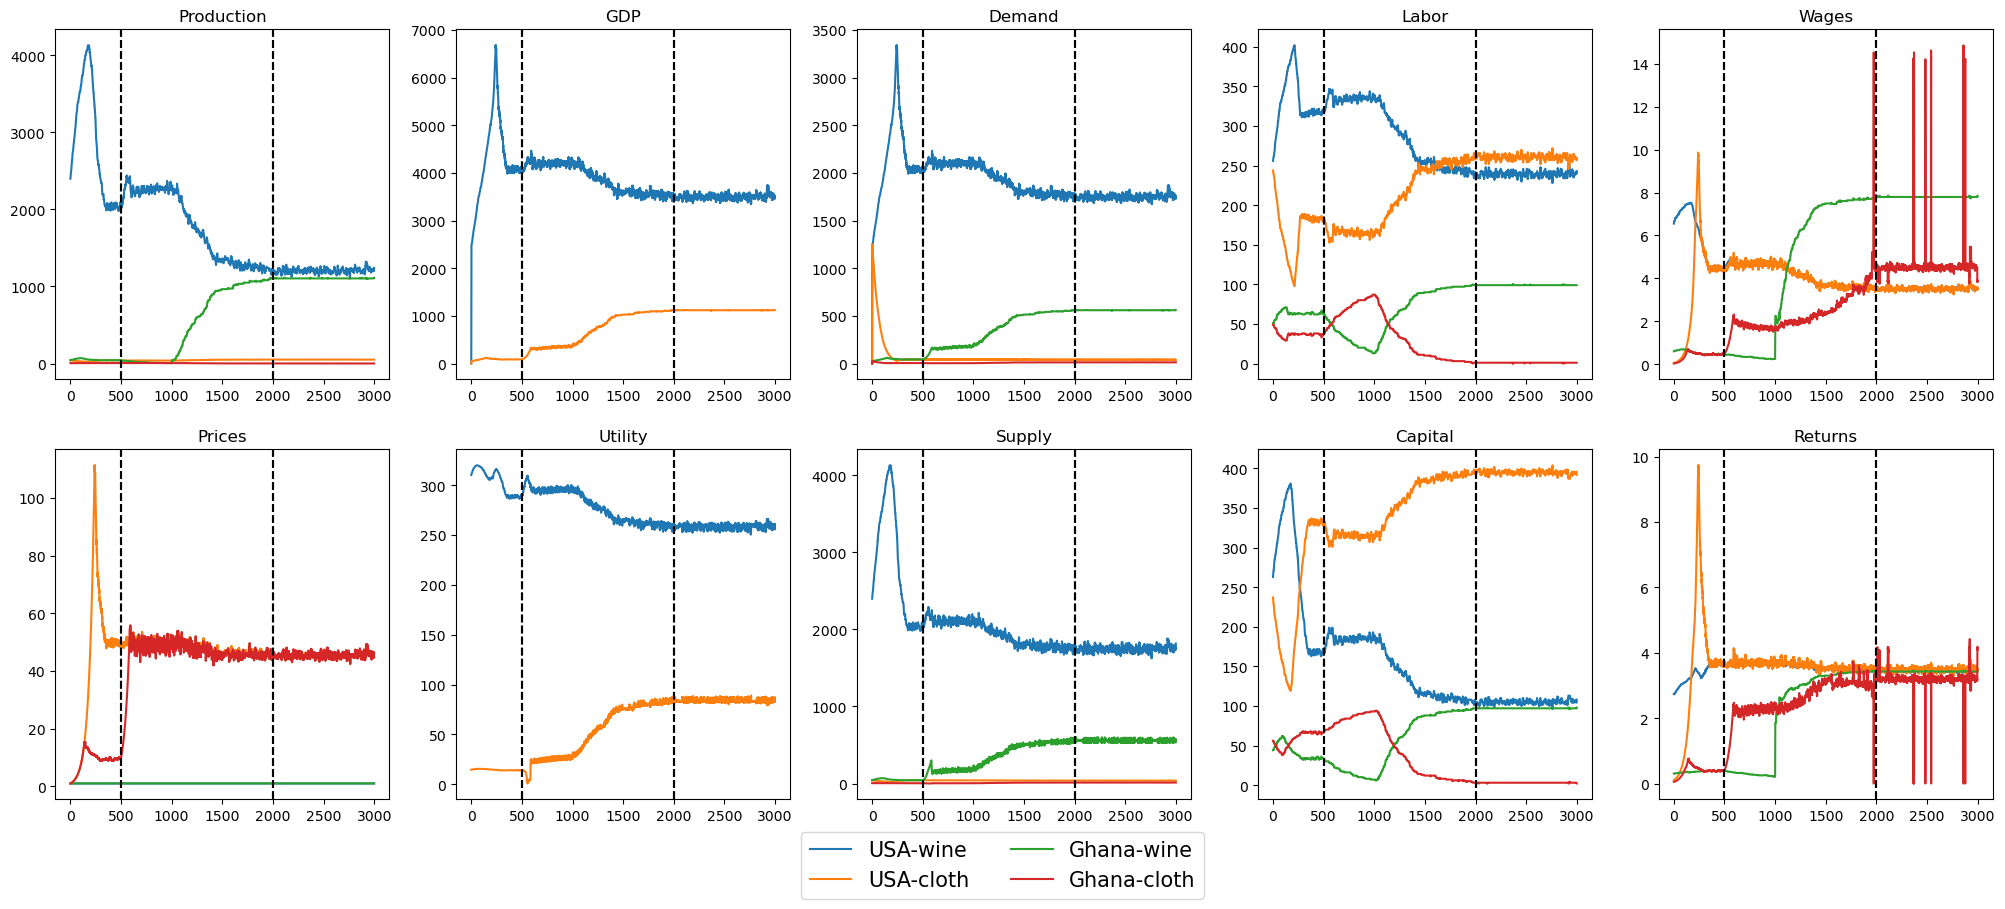

In [1]:
import numpy as np
import pandas as pd
from functions import production_function, regularise, wage_function, demand_function, innovate, plot_gdp_distribution, generate_nested_matrix, visualize_multi_layer_trade_network, array_to_dataframe
from tradeutils import doAllTrades
from pricing import updatePricesAndConsume
from tqdm import tqdm
from agents_vec import gulden_vectorised

np.random.seed(10)

# Constants
n_countries=2
n_products=2
countries = ['{i}'.format(i=i) for i in range(n_countries)]
products = ['{i}'.format(i=i) for i in range(n_products)]

alpha = np.array([[0.7, 0.4],
                  [0.7, 0.4]])  # output elasticity of labor

beta = np.array([[0.7, 0.4],
                 [0.7, 0.4]])  # output elasticity of capital

A = np.array([[1, .5],
              [0.2, 0.2]])  # Total Factor Productivity

shock = np.array([[1, .5],
                  [1.8, 0.2]])  # Total Factor Productivity

shock = np.array([shock])
share = np.ones(n_countries)

# Number of citizens in each nation
citizens_per_nation = [500, 100]

results = gulden_vectorised('Gomory-Boumol', n_countries, n_products, countries, products, 
                            citizens_per_nation, A, alpha, beta,  share, iterations=3000, 
                            Tr_time=[500,2000], trade_change=0.02, autarky_time=1500, 
                            pricing_algorithm='dgp', utility_algorithm='geometric',                        
                            wage_algorithm='marginal_product', csv=False, plot=True, shock=shock, 
                            shock_time=1000,  cm_time=10000, d=0.000, innovation=False, 
                            innovation_time=10000, gamma=1, eta=0.01,weights=None, elasticities=None, 
                            sigma=None, c_names=['USA','Ghana'], p_names=['wine','cloth'])

100%|██████████| 5000/5000 [00:21<00:00, 233.72it/s]


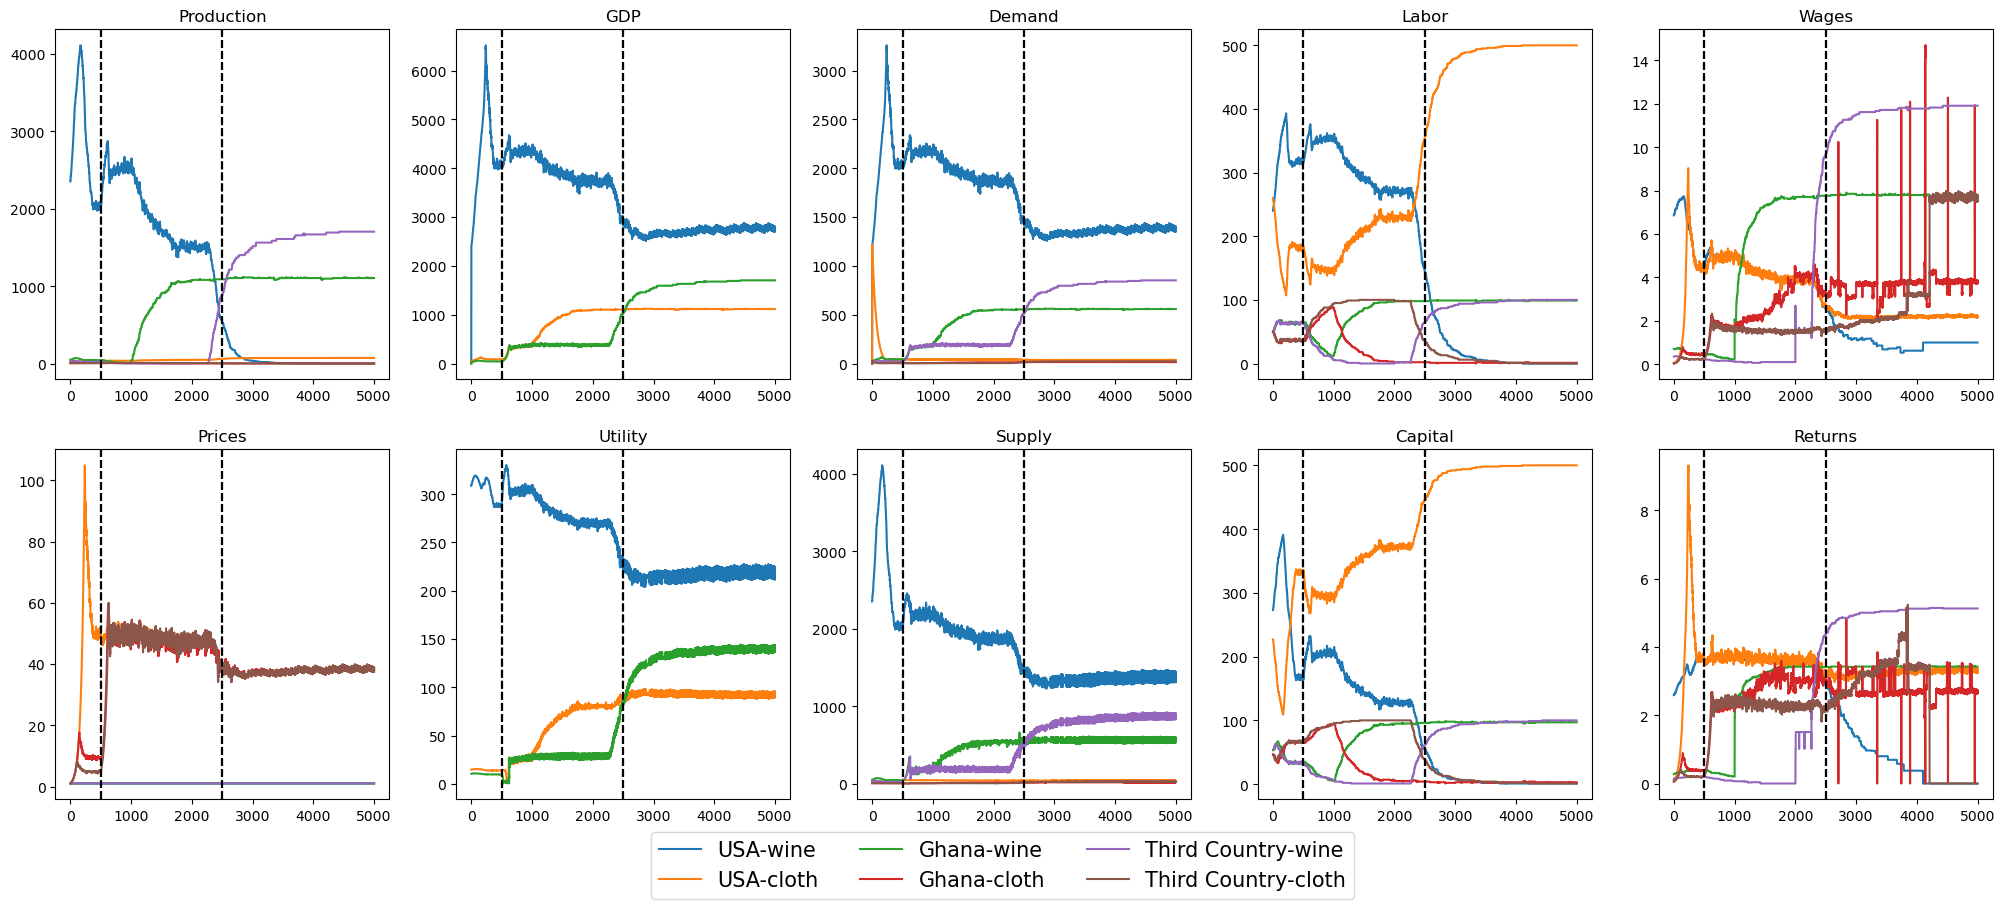

In [36]:
# Constants
n_countries = 3  # Increasing number of countries to 3
n_products = 2
countries = ['{i}'.format(i=i) for i in range(n_countries)]
products = ['{i}'.format(i=i) for i in range(n_products)]

# Adjusting alpha and beta to reflect production elasticities for three countries
alpha = np.array([[0.7, 0.4],  # USA
                  [0.7, 0.4],  # Ghana
                  [0.7, 0.4]]) # New Country (Third country)

beta = np.array([[0.7, 0.4],   # USA
                 [0.7, 0.4],   # Ghana
                 [0.7, 0.4]])  # New Country (Third country)

# Adjust Total Factor Productivity (A) to include a third country
# We give the new country a lower productivity to reflect their late entry into industries
A = np.array([[1, 0.5],    # USA
              [0.2, 0.2],  # Ghana
              [0.1, 0.2]]) # New Country (lower TFP)

# Shock in productivity to reflect exogenous growth for the third country at shock_time
shock1 = np.array([[1, 0.5],    # USA
                  [1.8, 0.2],  # Ghana
                  [0.1, 0.2]]) # New Country sees a larger growth in later stages

shock2 = np.array([[1, 0.5],
                  [1.8, 0.2],
                  [2.7, 0.2]])

shock = np.array([shock1, shock2])

# Modify citizens per nation to include third country
citizens_per_nation = [500, 100, 100]  # Adding citizens for third country
share = np.ones(n_countries)

# Run the simulation with the third country added
results = gulden_vectorised('Gomory-Boumol', n_countries, n_products, countries, products, 
                            citizens_per_nation, A, alpha, beta, share, iterations=5000, 
                            Tr_time=[500,2500], trade_change=0.02, autarky_time=2000, 
                            pricing_algorithm='dgp', utility_algorithm='geometric',                        
                            wage_algorithm='marginal_product', csv=False, plot=True, shock=shock, 
                            shock_time=np.array([1000,2000]),  cm_time=10000, d=0.000, innovation=False, 
                            innovation_time=10000, gamma=1, eta=0.01, weights=None, 
                            elasticities=None, sigma=None, c_names=['USA','Ghana','Third Country'], 
                            p_names=['wine','cloth'])


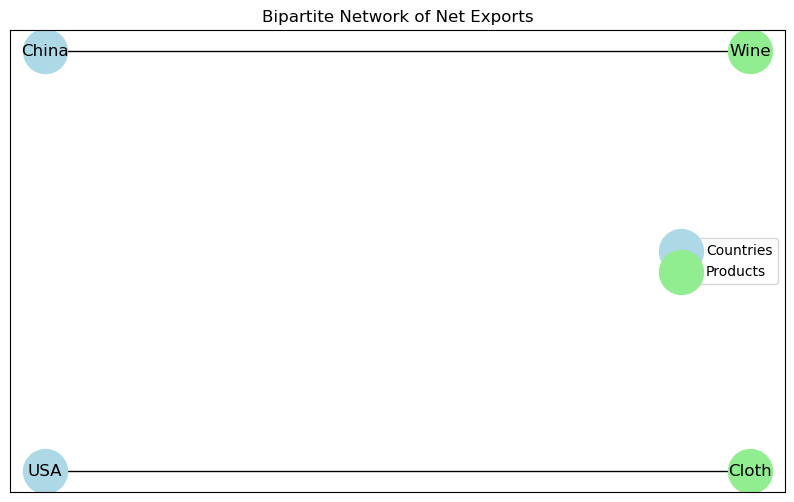

In [39]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Extract the net exports matrix from the results
net_exports = results[2]  # Assuming results[3] is the net exports matrix
net_exports[net_exports>0]=0
net_exports = -net_exports

# Normalize the net exports matrix to get the share of exports
total_exports = np.sum(net_exports, axis=1, keepdims=True)
share_exports = net_exports / total_exports
# Create a bipartite graph
B = nx.Graph()

# Define the nodes for countries and products
countries = ['USA', 'China']
products = ['Wine', 'Cloth']

# Add nodes with the bipartite attribute
B.add_nodes_from(countries, bipartite=0)
B.add_nodes_from(products, bipartite=1)

# Add edges with the share of exports as weights
for i, country in enumerate(countries):
    for j, product in enumerate(products):
        if share_exports[i, j] > 0:  # Add an edge only if there is a positive share of exports
            B.add_edge(country, product, weight=share_exports[i, j])
# Get positions for the nodes in the bipartite graph
pos = nx.bipartite_layout(B, countries)

# Draw the nodes and edges
plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(B, pos, nodelist=countries, node_color='lightblue', node_size=1000, label='Countries')
nx.draw_networkx_nodes(B, pos, nodelist=products, node_color='lightgreen', node_size=1000, label='Products')

# Draw edges with weights
edges = B.edges(data=True)
weights = [d['weight'] for (u, v, d) in edges]
nx.draw_networkx_edges(B, pos, edgelist=edges, width=weights)

# Draw labels
nx.draw_networkx_labels(B, pos)

# Add title and legend
plt.title('Bipartite Network of Net Exports')
plt.legend(loc='best')
plt.show()


# Technological 

100%|██████████| 2000/2000 [00:08<00:00, 246.03it/s]


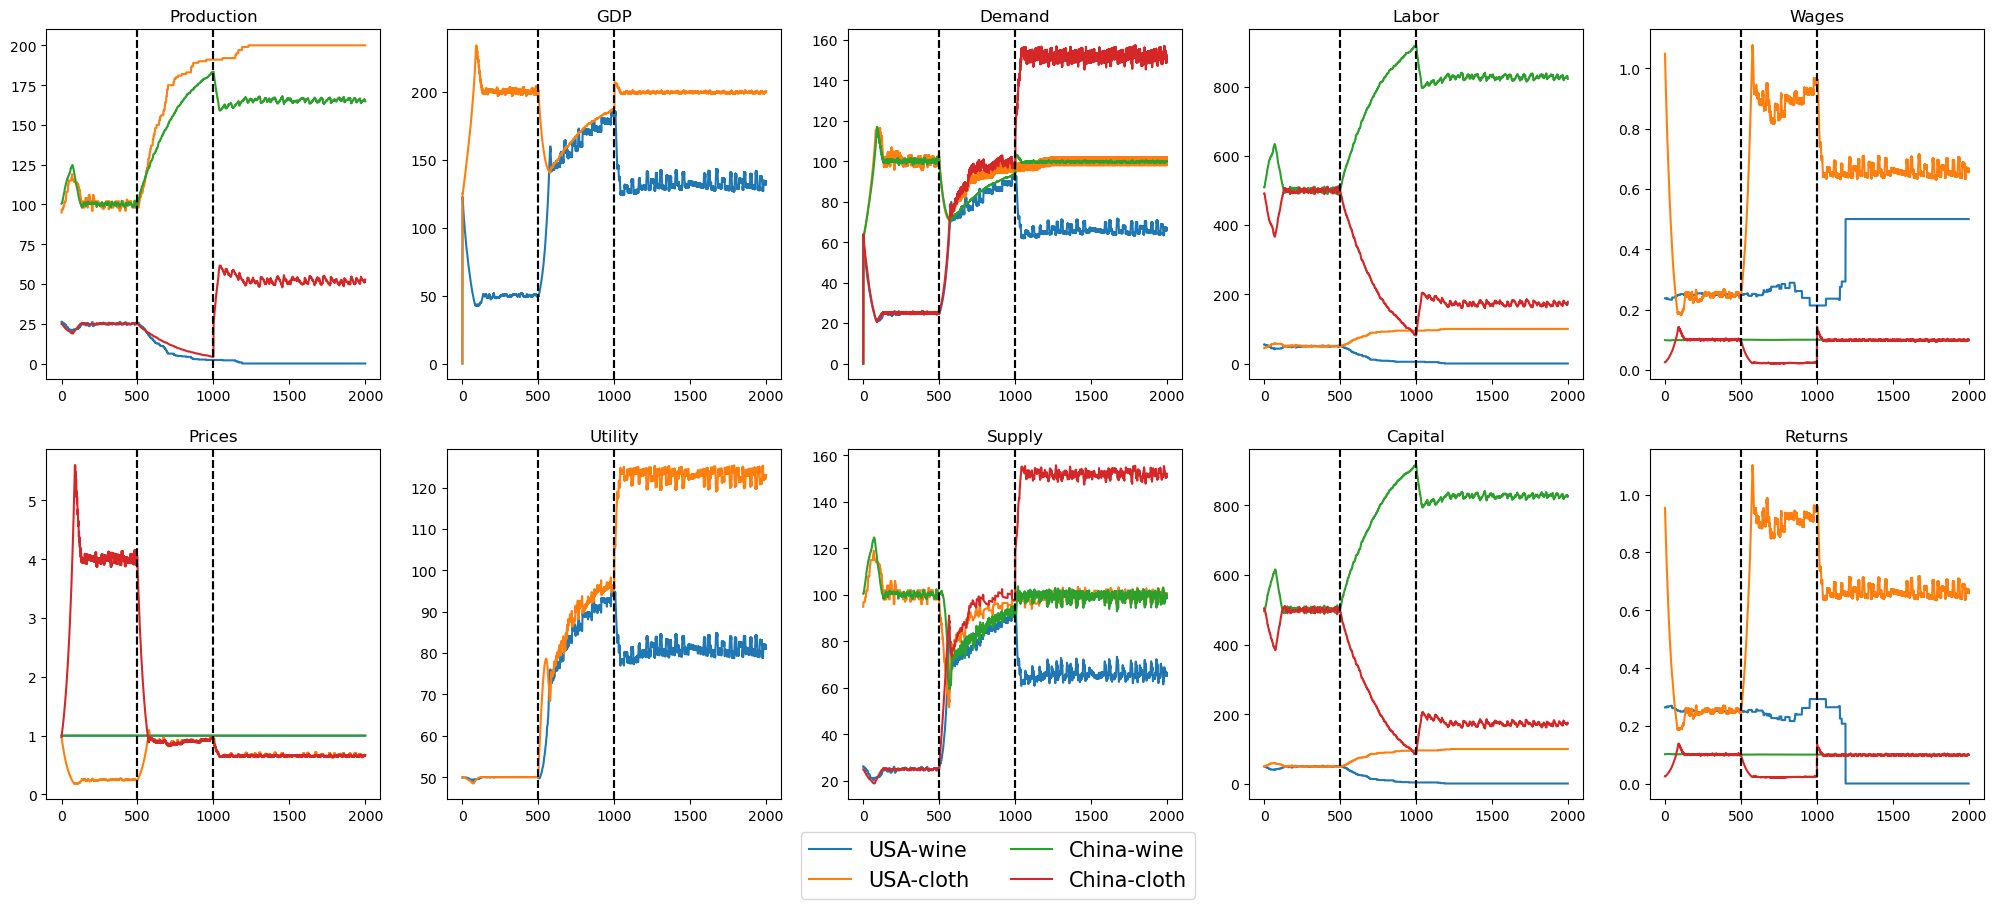

In [24]:
import numpy as np
import pandas as pd
from functions import production_function, regularise, wage_function, demand_function, innovate, plot_gdp_distribution, generate_nested_matrix, visualize_multi_layer_trade_network, array_to_dataframe
from tradeutils import doAllTrades
from pricing import updatePricesAndConsume
from tqdm import tqdm
from agents_vec import gulden_vectorised
np.random.seed(10)

n_countries=2
n_products=2
countries = ['{i}'.format(i=i) for i in range(n_countries)]
products = ['{i}'.format(i=i) for i in range(n_products)]

A     = np.array([[0.5, 2.0],
                  [0.2, 0.05]])  # Total Factor Productivity

shock = np.array([[0.5, 2.0],
                  [0.2, 0.3]])  # Total Factor Productivity

share = np.ones(n_countries)
# share = np.array([1,0.5])

# Number of citizens in each nation
citizens_per_nation = [100, 1000]
alpha = np.ones((n_countries, n_products)) * 0.5
beta = np.ones((n_countries, n_products)) * 0.5

results = gulden_vectorised('gulden_samuelson', n_countries, n_products, countries, products, citizens_per_nation, A, 
                            alpha, beta,  share, iterations=2000, Tr_time=500, trade_change=0.01, autarky_time=10000,
                            pricing_algorithm='dgp', utility_algorithm='geometric', wage_algorithm='marginal_product', 
                            csv=False, plot=True, shock=shock, shock_time=1000,  cm_time=10000, d=0.000, 
                            c_names=['USA', 'China'], p_names=['wine','cloth'])



100%|██████████| 2000/2000 [00:06<00:00, 313.14it/s]


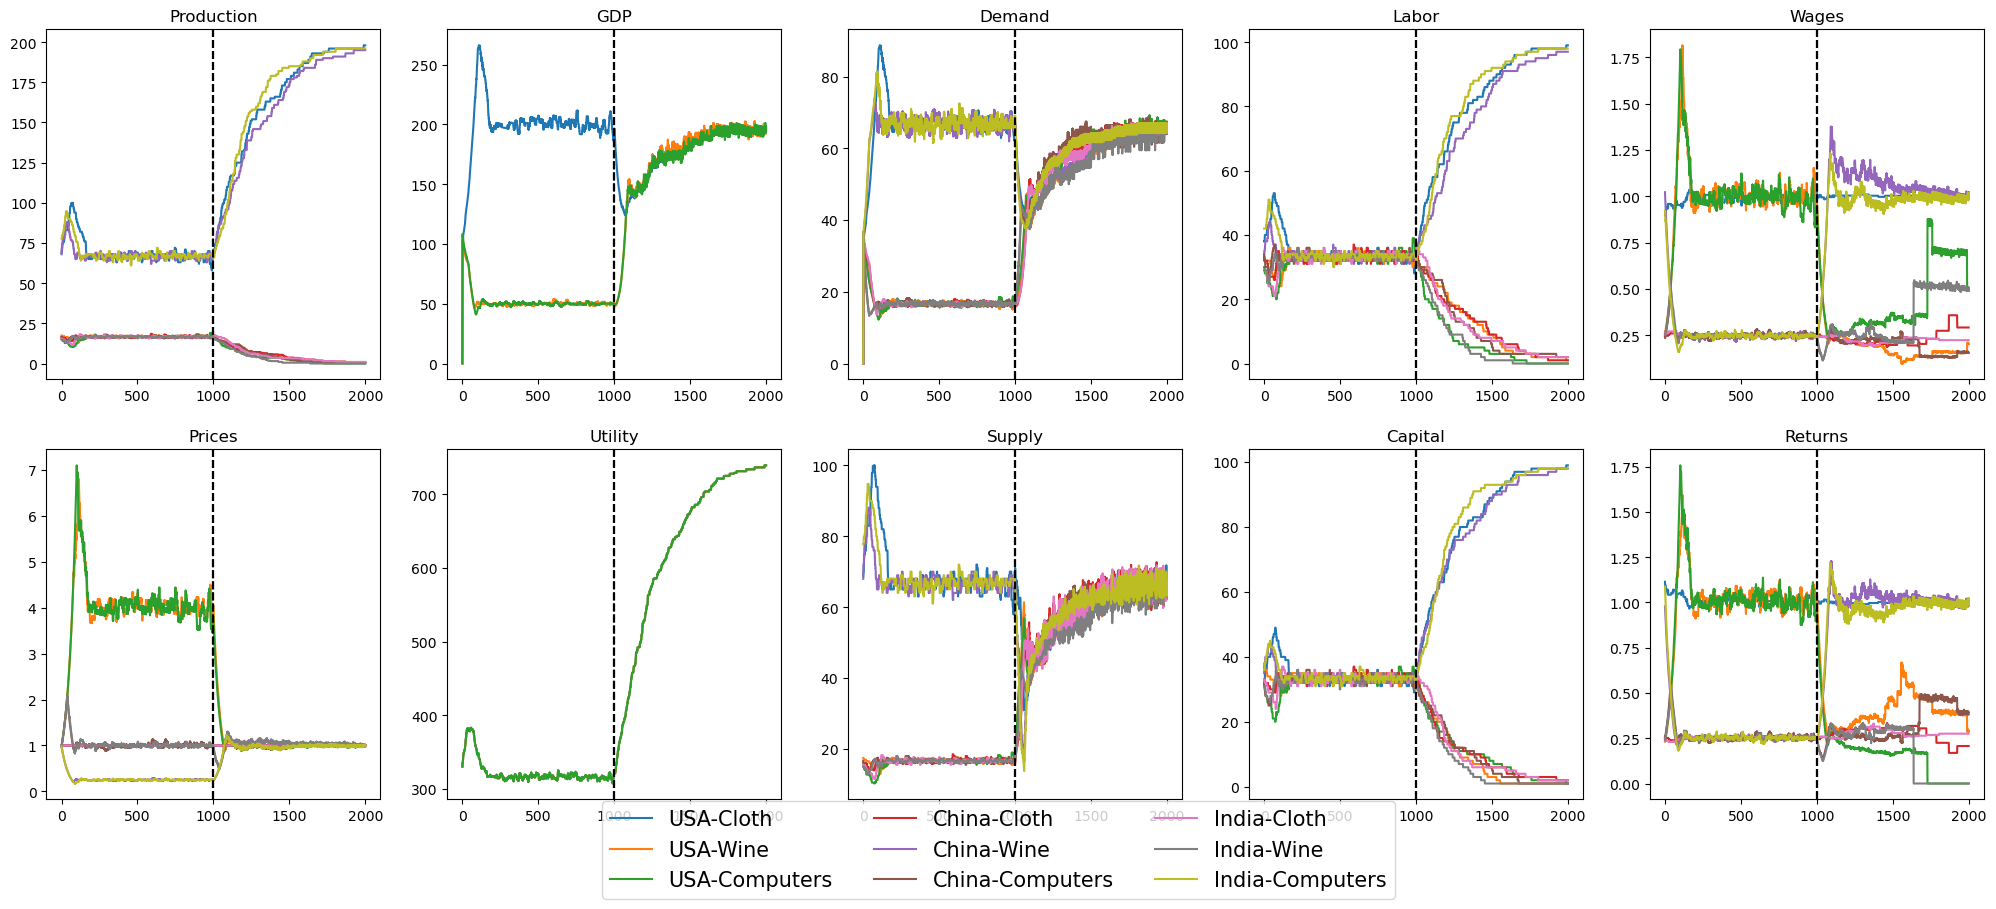

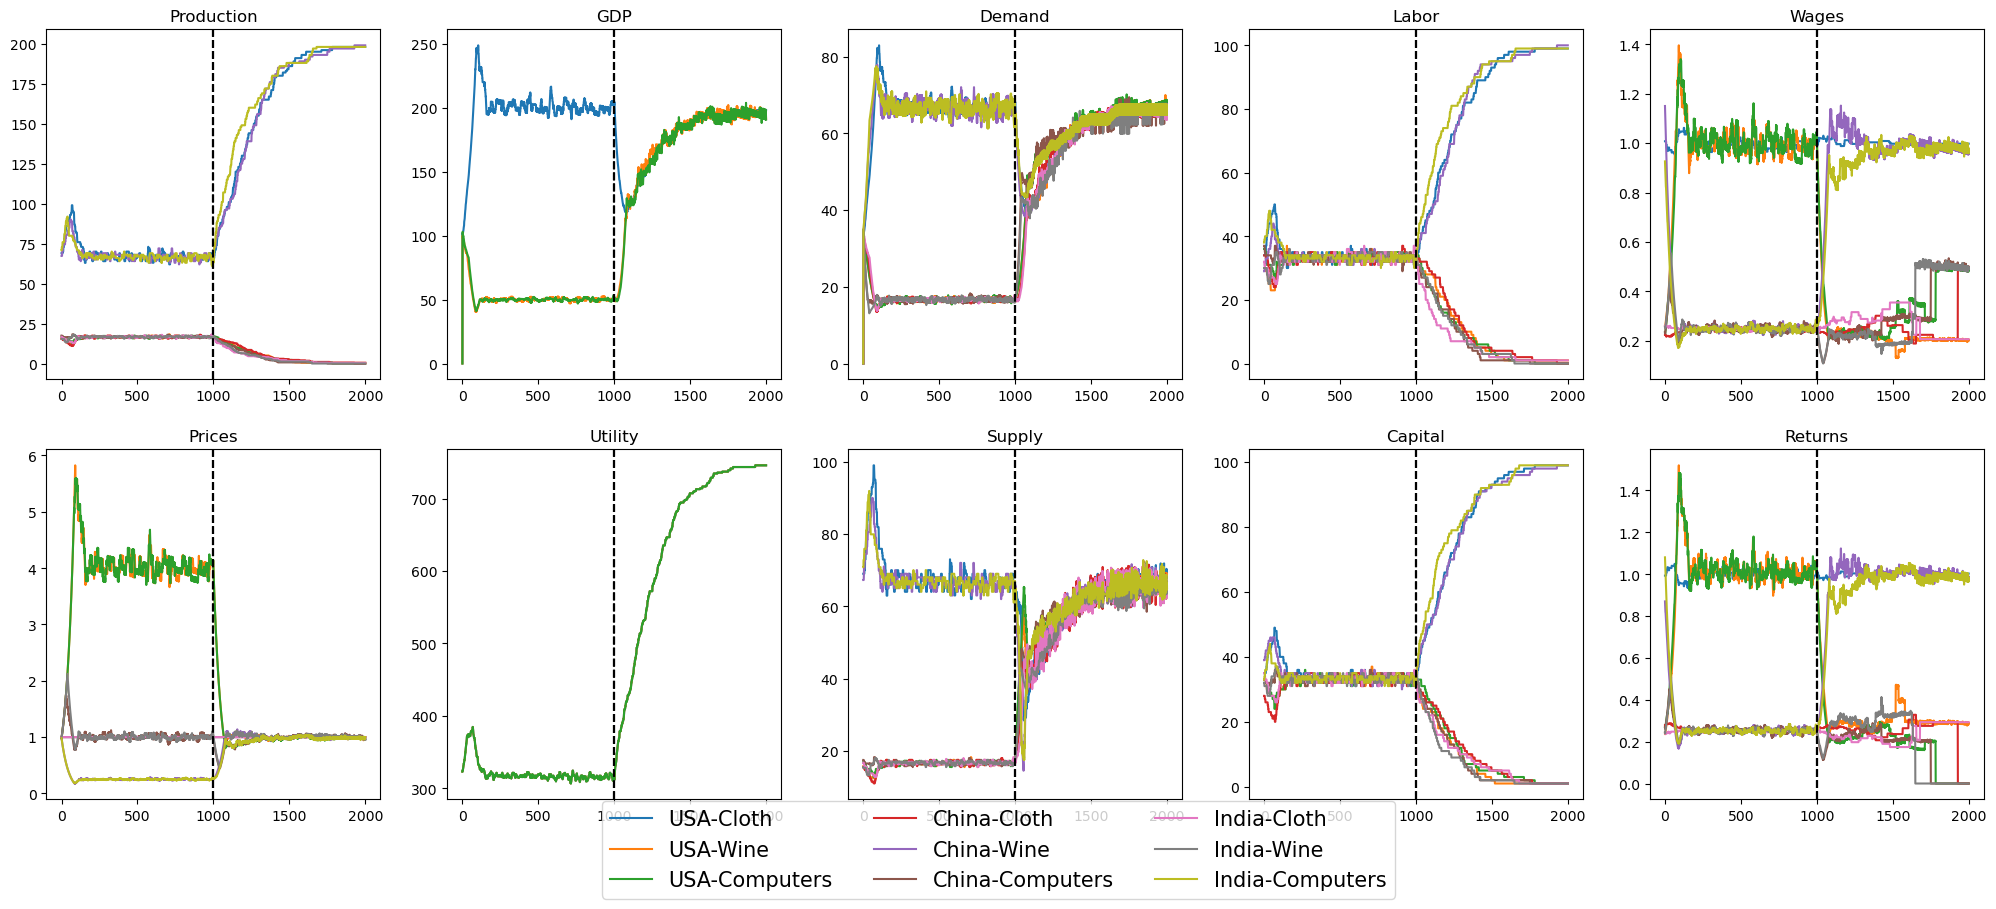

In [28]:
import numpy as np
import pandas as pd
from functions import production_function, regularise, wage_function, demand_function, innovate, plot_gdp_distribution, generate_nested_matrix, visualize_multi_layer_trade_network, array_to_dataframe
from tradeutils import doAllTrades
from pricing import updatePricesAndConsume
from tqdm import tqdm
from agents_vec import gulden_vectorised
np.random.seed(10)

n_countries=3
n_products=3
countries = ['{i}'.format(i=i) for i in range(n_countries)]
products = ['{i}'.format(i=i) for i in range(n_products)]

# Initial Productivity (A matrix)
A = np.array([[2.0, 0.5, 0.5],  # USA: strongest in Cloth
              [0.5, 2.0, 0.5],  # China: strongest in Wine
              [0.5, 0.5, 2.0]]) # India: strongest in Computers

# Define the shock matrix: productivity improvement in India's Cloth sector
shock = np.array([[2.0, 0.5, 0.5],
                  [0.5, 2.0, 0.5],
                  [0.5, 2.5, 2.0]])  # India improves in Cloth


share = np.ones(n_countries)
# share = np.array([0.5, 0.2])
weights = np.ones(n_products) / n_products
elasticities = np.ones(n_products)
sigma = 0.8

# Number of citizens in each nation
# citizens_per_nation = [100, 100, 100]
citizens_per_nation2 = [100, 1000, 500]
alpha = np.ones((n_countries, n_products)) * 0.5
beta = np.ones((n_countries, n_products)) * 0.5

results_pre_shock = gulden_vectorised('pre_shock', n_countries, n_products, countries, products, citizens_per_nation, A, 
                                      alpha, beta,  share, iterations=2000, Tr_time=1000, trade_change=0.01, autarky_time=10000,
                                      pricing_algorithm='dgp', utility_algorithm='ces', wage_algorithm='marginal_product', 
                                      csv=False, plot=True, shock=None, shock_time=10000,  cm_time=10000, d=0.000, 
                                      c_names=['USA', 'China', 'India'], p_names=['Cloth','Wine','Computers'], 
                                      weights=weights, elasticities=elasticities, sigma=sigma)

results_post_shock = gulden_vectorised('post_shock', n_countries, n_products, countries, products, citizens_per_nation, A, 
                                       alpha, beta,  share, iterations=2000, Tr_time=1000, trade_change=0.01, autarky_time=10000,
                                       pricing_algorithm='dgp', utility_algorithm='ces', wage_algorithm='marginal_product', 
                                       csv=False, plot=True, shock=shock, shock_time=10000,  cm_time=10000, d=0.000, 
                                       c_names=['USA', 'China', 'India'], p_names=['Cloth','Wine','Computers'], 
                                       weights=weights, elasticities=elasticities, sigma=sigma)

## CES

/rds/general/user/nk821/home/anaconda3/envs/networks/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
100%|██████████| 2000/2000 [00:06<00:00, 323.05it/s]


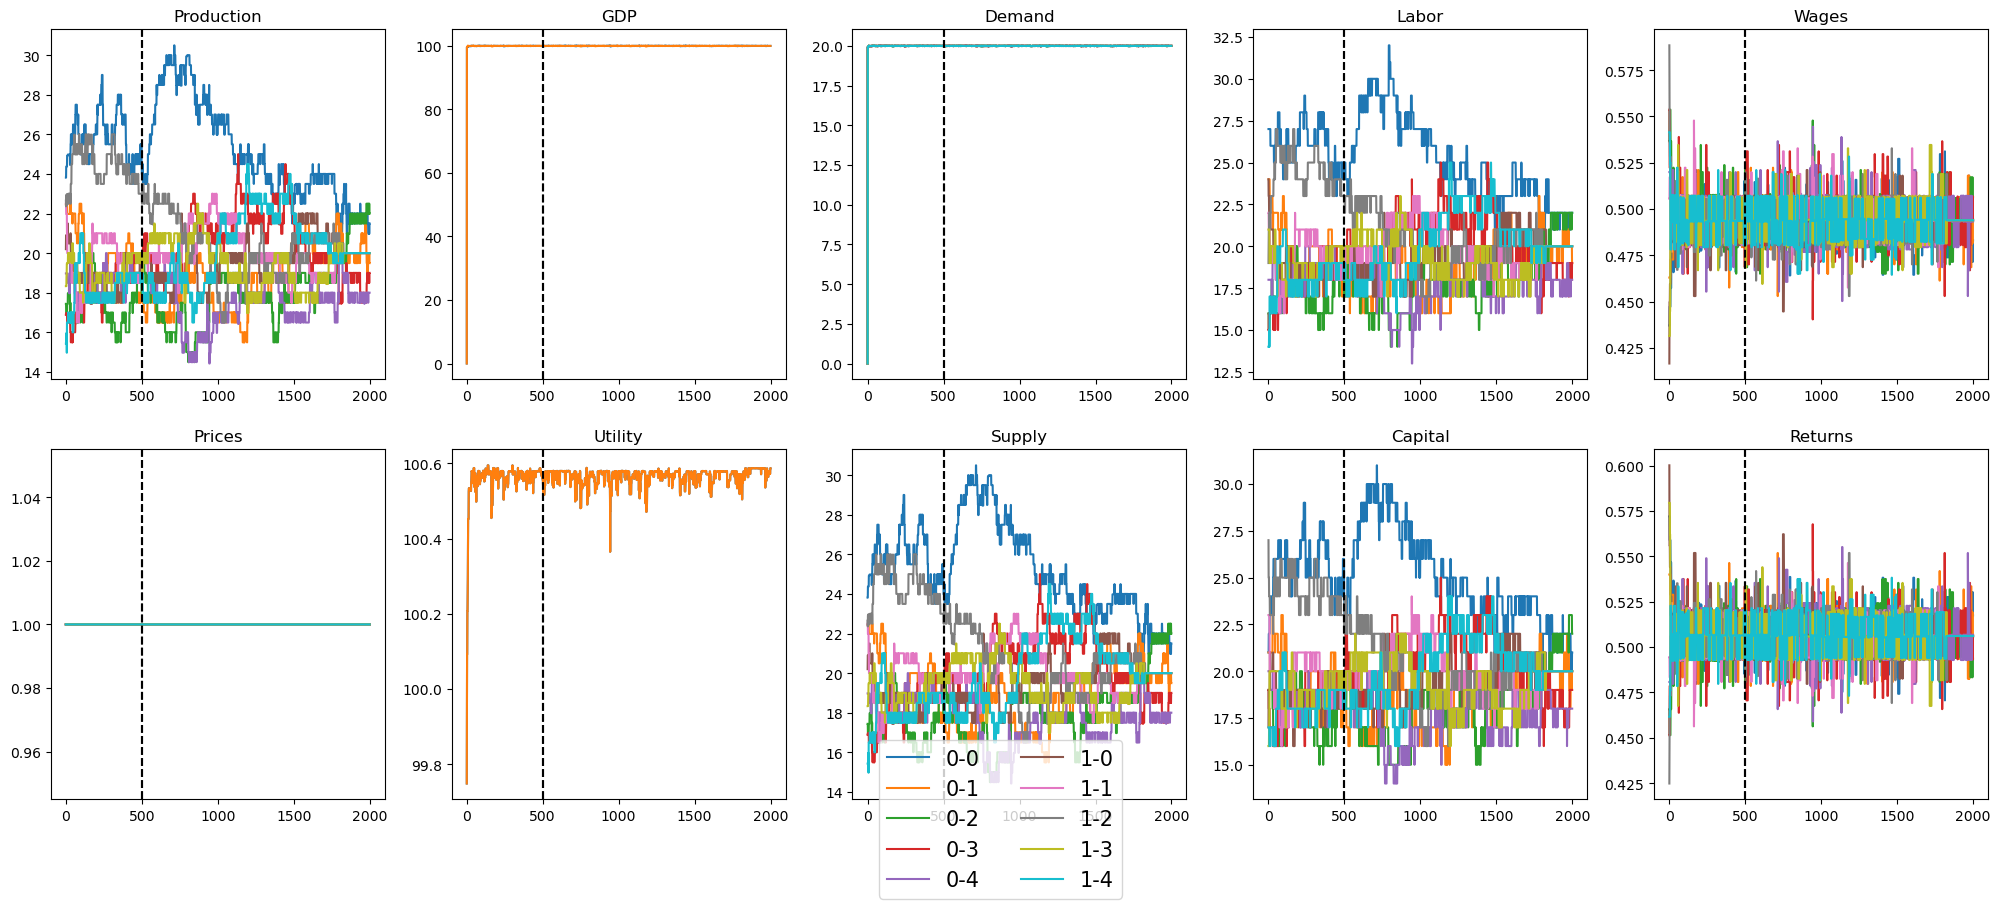

In [1]:
import numpy as np
import pandas as pd
from functions import production_function, regularise, wage_function, demand_function, innovate, plot_gdp_distribution, generate_nested_matrix, visualize_multi_layer_trade_network, array_to_dataframe
from tradeutils import doAllTrades
from pricing import updatePricesAndConsume
from tqdm import tqdm
from agents_vec import gulden_vectorised
np.random.seed(10)

n_countries=2
n_products=5
countries = ['{i}'.format(i=i) for i in range(n_countries)]
products = ['{i}'.format(i=i) for i in range(n_products)]

# A     = np.array([[1, 1],
#                   [1, 1]])  # Total Factor Productivity
A = np.ones((n_countries,n_products))

shock = np.array([[0.5, 2.0],
                  [0.2, 0.8]])  # Total Factor Productivity

share = np.ones(n_countries)
# share = np.array([1, 1])

weights = np.ones(n_products) / n_products
elasticities = np.ones(n_products)
sigma = 0.8

# Number of citizens in each nation
citizens_per_nation = [100, 100]
# citizens_per_nation = [100, 200, 300, 400, 1000]

alpha = np.ones((n_countries, n_products)) * 0.5
beta = np.ones((n_countries, n_products)) * 0.5

results = gulden_vectorised('gulden_samuelson', n_countries, n_products, countries, products, citizens_per_nation, A, 
                            alpha, beta,  share, iterations=2000, Tr_time=500, trade_change=0.01, autarky_time=10000,
                            pricing_algorithm='cpmu', utility_algorithm='ces', wage_algorithm='marginal_product', 
                            csv=False, plot=True, shock=shock, shock_time=10000,  cm_time=10000, d=0.000, weights=weights,elasticities=elasticities, sigma=sigma)



In [3]:
np.zeros_like(elasticities)

array([0., 0.])

100%|██████████| 2000/2000 [00:08<00:00, 233.04it/s]


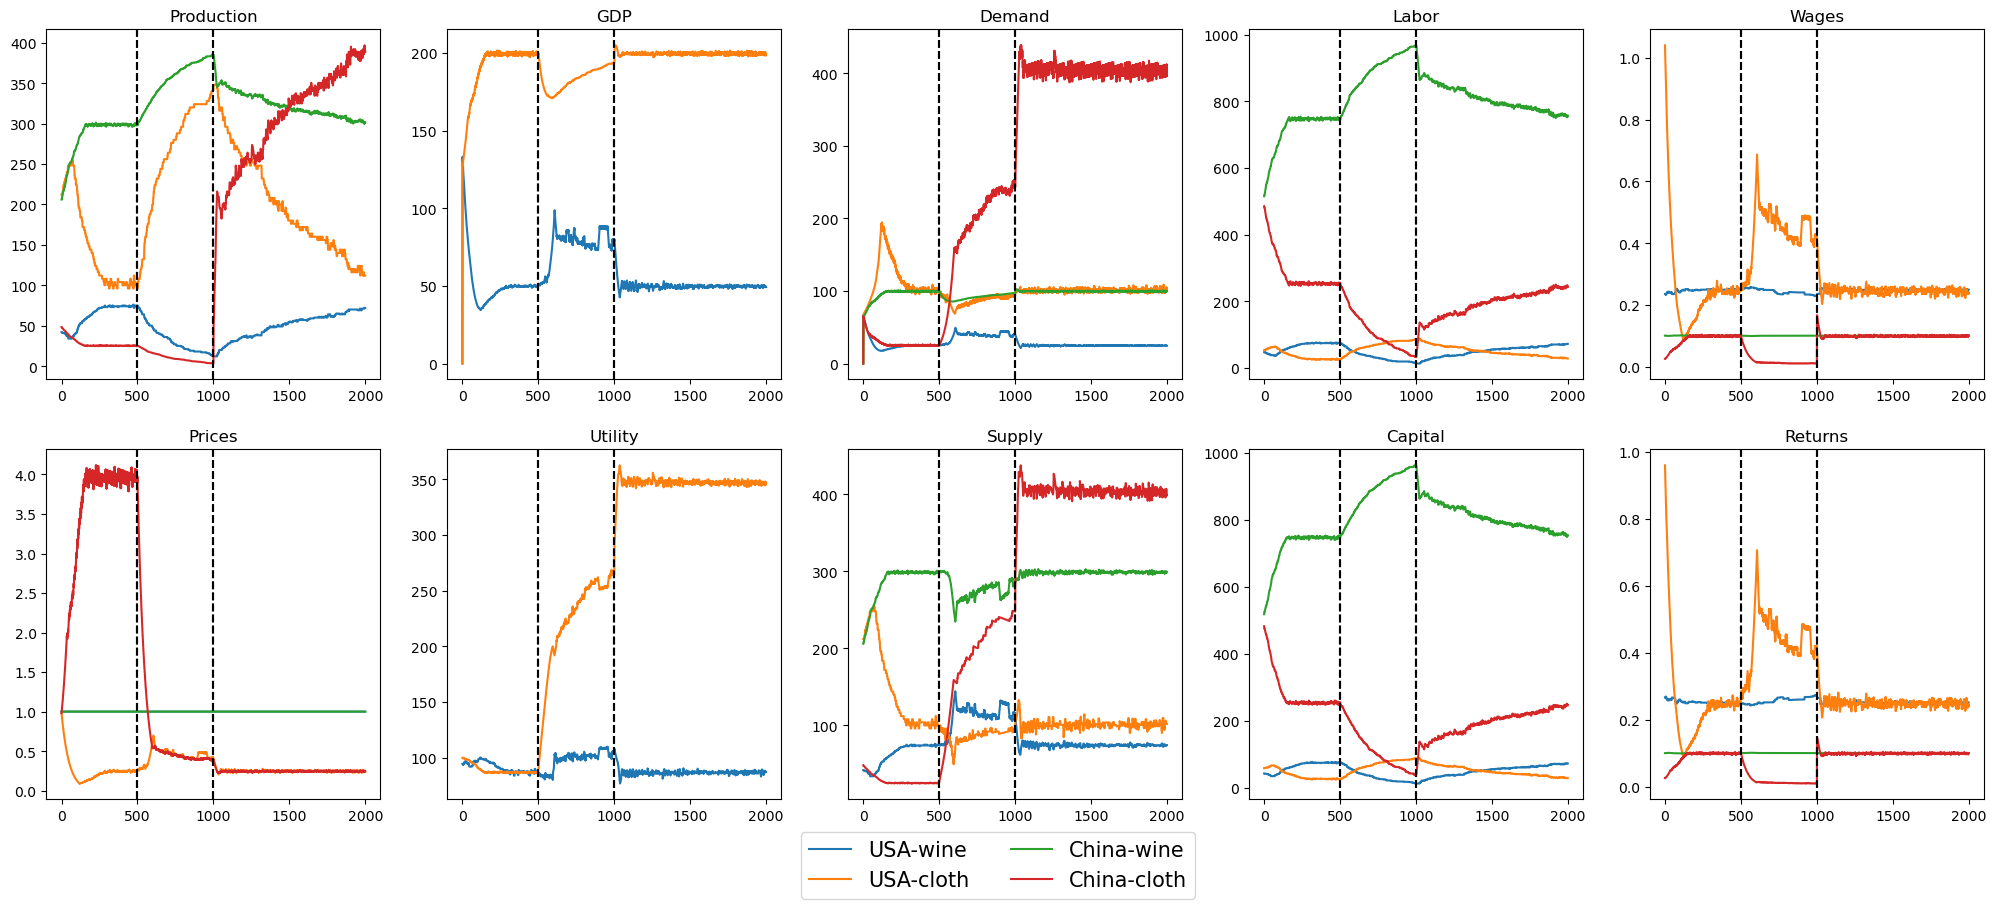

In [2]:
results = gulden_vectorised('gulden_samuelson', n_countries, n_products, countries, products, citizens_per_nation, A, 
                            alpha, beta,  share, iterations=2000, Tr_time=500, trade_change=0.01, autarky_time=10000,
                            pricing_algorithm='dgp', utility_algorithm='geometric', wage_algorithm='marginal_product', 
                            q_fun = 'leontif', csv=False, plot=True, shock=shock, shock_time=1000,  cm_time=10000, d=0.000, 
                            c_names=['USA', 'China'], p_names=['wine','cloth'])